# Titanic Survival Predictions

I am new to data science and machine learning and this is my first attempt at Kaggle where I will be trying to predict the possibility of a passenger surviving on the Titanic using the Titanic: Machine Learning from Disaster dataset**

We will tackle this problem with the following steps

    1.Importing the packages and libraries.
    2.Reading and Exploring the Data.
    3.Data Analysis.
    4.Visual Data Analysis.
    5.Cleaning the Data
    6.Feature Engineering
    7.Machine learning
    8.Submitting our predictions

I would love to see your feedback in the comments section!

    1) Importing the packages and libraries

let's start off by importing the necessary libraries for data analysis and visualisation

In [1]:
#Loading packages and libraries required for data analysis
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

    2) Reading and exploring the data

let's read the training and testing datasets from the provided CSV files and use the .head() and .info() methods to take a glimpse at our data

In [2]:
#Reading our dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
#lets take a look at our training data
train.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,NaN,0


In [4]:
# Now the test dataset
test.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat
0,1148,3.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,NaN,S,NaN
1,1049,3.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,NaN,C,C
2,982,3.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,NaN,S,NaN
3,808,3.0,"Ford, Mr. Arthur",male,NaN,0.0,0.0,A/5 1478,8.0500,NaN,S,NaN
4,1195,3.0,"Shaughnessy, Mr. Patrick",male,NaN,0.0,0.0,370374,7.7500,NaN,Q,NaN


The Survived column is missing here because that is what we are supposed to predict with our model.

In [5]:
#the submission dataset
submission.head()

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,1
4,1195,0


In [6]:
# lets see what kind of data we have to work with
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
traveller_ID        916 non-null int64
ticket_class        916 non-null int64
name                916 non-null object
sex                 916 non-null object
age                 729 non-null float64
Siblings_spouses    916 non-null int64
Parchil             916 non-null int64
TickNum             916 non-null object
fare                915 non-null float64
cabin               204 non-null object
embarked            915 non-null object
MedBoat             327 non-null object
Survived            916 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 93.2+ KB


From above, we can see that we have 891 rows or samples and 12 columns of types int64 , object and float64 to work with

    3) Data analysis :

Now let's see what features we have to train our model on and what useful insights we can obtain from them.

In [7]:
#printing out a list of all the columns in our training dataset
train.columns

Index(['traveller_ID', 'ticket_class', 'name', 'sex', 'age',
       'Siblings_spouses', 'Parchil', 'TickNum', 'fare', 'cabin', 'embarked',
       'MedBoat', 'Survived'],
      dtype='object')

In [8]:
test.columns

Index(['traveller_ID', 'ticket_class', 'name', 'sex', 'age',
       'Siblings_spouses', 'Parchil', 'TickNum', 'fare', 'cabin', 'embarked',
       'MedBoat'],
      dtype='object')

Types of features :

Categorical : ticket_class, sex, embarked, Survived

Continuous : age, fare, Siblings_spouses, Parchil, traveller_ID

Alphanumeric: TickNum, cabin, name

Now that we know what kind of features we are going to work with, let's take a look what information they provide us:

In [9]:
#printing summary statistics
train.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


Observations from above summary statistics:

There are a total of 916 travellers in our training dataset.

Since the Survived column has dicrete data, the mean gives us the number of people survived from 916 i.e. 36%.

Most people belonged to ticket_class = 3

The maximum fare paid for a ticket was 512 however the fare prices varied a lot as we can see from the standard deviation of 52.8

In [10]:
train.describe(include='O')

,name,sex,TickNum,cabin,embarked,MedBoat
count,916,916,916,204,915,327
unique,915,2,694,146,3,24
top,"Connolly, Miss. Kate",male,CA. 2343,B57 B59 B63 B66,S,13
freq,2,592,9,5,638,30


Taking a look at our categorical features we find that:

The traveller column has two sexes with male being the most common.

Cabin feature has many duplicate values.

Embarked has three possible values with most travellers embarking from Southhampton.

Names of all passengers are unique.

Ticket column also has a fair amount of duplicate values.

In [11]:
# Finding the percentage missing values in train dataset

train.isnull().sum()/len(train)*100

traveller_ID         0.000000
ticket_class         0.000000
name                 0.000000
sex                  0.000000
age                 20.414847
Siblings_spouses     0.000000
Parchil              0.000000
TickNum              0.000000
fare                 0.109170
cabin               77.729258
embarked             0.109170
MedBoat             64.301310
Survived             0.000000
dtype: float64

In [12]:
# Finding the percentage missing values in test dataset

test.isnull().sum()/len(test)*100

traveller_ID         0.000000
ticket_class         0.000000
name                 0.000000
sex                  0.000000
age                 19.338422
Siblings_spouses     0.000000
Parchil              0.000000
TickNum              0.000000
fare                 0.000000
cabin               76.844784
embarked             0.254453
MedBoat             59.541985
dtype: float64

As we can see the Age column and Embarked column are missing values that we will need to fill. The Cabin coulmn has 77.7% and 76.8% missing values in train and test datasets respectively hence, it might be worth considering dropping that feature.

    4) Visual Data Analysis

It's time to visualize our data and try to draw some inferences from it

Sex feature

let's begin by exploring the Sex column in our trainig data set

male      592
female    324
Name: sex, dtype: int64

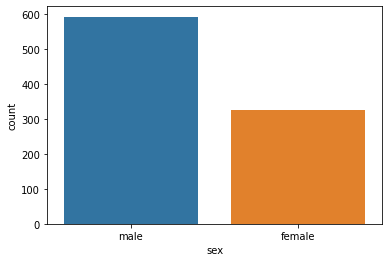

In [13]:
#Sex distribution
sns.countplot('sex',data=train)
train['sex'].value_counts()

,sex,Survived
0,female,0.694444
1,male,0.179054


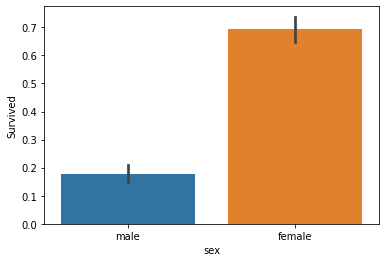

In [14]:
#Comparing the Sex feature against Survived
sns.barplot(x='sex',y='Survived',data=train)
train.groupby('sex',as_index=False).Survived.mean()

The number of males on board were clearly more than the female. Now let's see how their survival percentages were:

As one would assume the number of female who survived was much more than the males who survived i.e. 69.4% females as against to 17.9% males

How did the Class of each travellers affect their survival?

,ticket_class,Survived
0,1,0.607930
1,2,0.390110
2,3,0.240631


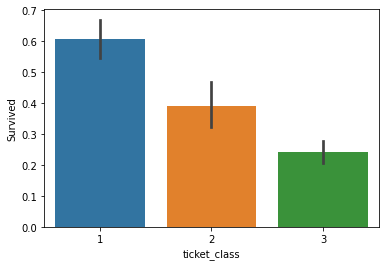

In [15]:
#Comparing the ticket_class feature against Survived
sns.barplot(x='ticket_class',y='Survived',data=train)
train[['ticket_class', 'Survived']].groupby(['ticket_class'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Clearly Class had an effect on survival of each traveller with the percentages of survival being 60.8%, 39.0%, 24.1% for ticket_class 1, 2 and 3 respectively. Thus, belonging to ticket_class = 1 had a huge advantage.

Did the port from which the travellers embarked have an effect on their Survival?

,embarked,Survived
0,C,0.545455
2,S,0.313480
1,Q,0.311111


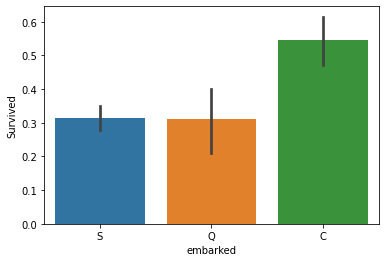

In [16]:
#Comparing the embarked feature against Survived
sns.barplot(x='embarked',y='Survived',data=train)
train[["embarked", "Survived"]].groupby(['embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

It seems that the travelersers that embarked from port Cherbourg had a higher rate of Survival at 54.5%.  This could be either due to their Sex or socio-economic class. 

Let's move forward to see the effect of having parents or children on-board.

,Parchil,Survived
1,1,0.573913
3,3,0.500000
2,2,0.461538
0,0,0.317730
4,4,0.250000
5,5,0.200000
6,6,0.000000
7,9,0.000000


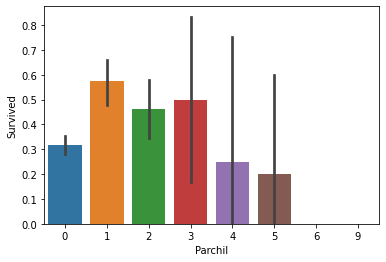

In [17]:
#Comparing Parchil feature against Survived
sns.barplot(x='Parchil',y='Survived',data=train)
train[["Parchil", "Survived"]].groupby(['Parchil'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Looks like travellers who had either 1, 2 or 3 had a higher possibility of surviving than the ones had none. However having more than 3 made the possibility even lesser. 

Moving on to the effect of having spouse or siblings on Survival:

,Siblings_spouses,Survived
1,1,0.484979
2,2,0.484848
0,0,0.320661
3,3,0.294118
4,4,0.176471
5,5,0.000000
6,8,0.000000


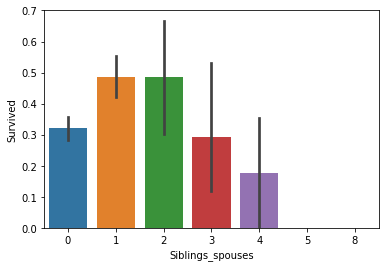

In [18]:
#Comparing Siblings_spouses against Survived
sns.barplot(x='Siblings_spouses',y='Survived',data=train)
train[["Siblings_spouses", "Survived"]].groupby(['Siblings_spouses'], as_index=False).mean().sort_values(by='Survived', ascending=False)

It seems that having a spouse or 1 sibling had a positive effect on Survival as compared to being alone. Though the chances of survival go down with the number of siblings after 1.

The Age column has some missing values. We will take care of that later when we clean our training data. First we shall proceed by:

Plotting a histogram of the age values .

Taking a look at the median value of age as well as the spread.

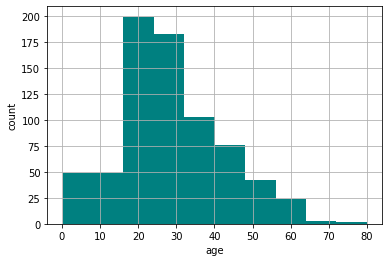

The Median age of travellers is : 28
The Standard Deviation age of travellers is : 13


In [19]:
#Train histogram plot for Median and Std
train.age.hist(bins=10,color='teal')
plt.xlabel('age')
plt.ylabel('count')
plt.show()
print("The Median age of travellers is :", int(train.age.median()))
print("The Standard Deviation age of travellers is :", int(train.age.std()))

It is obvious to assume that younger individuals were more likely to survive, however we should test our assumption before we proceed.

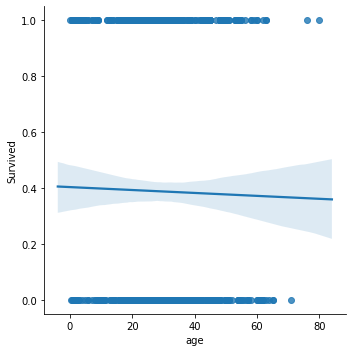

In [20]:
#Age distribution against Survived
sns.lmplot(x='age',y='Survived',data=train,palette='Set1')

Our assumption was right, younger individuals were more likely to survive.

From the sex column we saw that there was a significant difference in the percentage of men and women that survived.

Does sex also play a role when it comes to surviving the disaster along with the age?

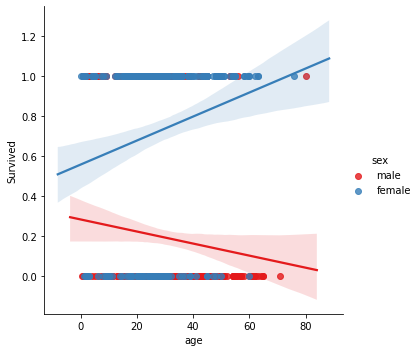

In [21]:
#Age and Sex distributiin against Survived
sns.lmplot(x='age',y='Survived',data=train,hue='sex',palette='Set1')

Interestingly, age has an opposite effect on the survival in men and women. The chances of survival increase as the age of women increases.

Takeaway: Age feature can have a different effect on the outcome depending on the sex of the passenger. Perhaps we can use this information in feature engineering

,sex,age
0,female,27.0
1,male,28.0


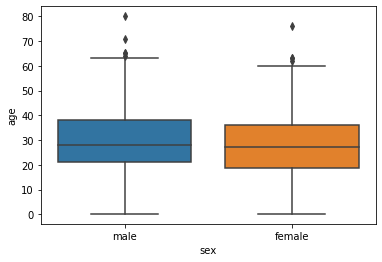

In [24]:
#Checking for outliers in Age data
sns.boxplot(x='sex',y='age',data=train)

#getting the median age according to Sex
train.groupby('sex',as_index=False)['age'].median()

Mean value of fare is : 33.70922076502725
Median value of fare is : 14.5


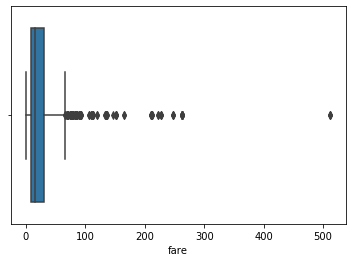

In [25]:
#plotting the fare column to see the spread of data
sns.boxplot("fare",data=train)

#Checking the mean and median values
print("Mean value of fare is :",train.fare.mean())
print("Median value of fare is :",train.fare.median())

    5) Cleaning Data *

Now that we have visualized our data , we can proceed to fill in the NaN values in our test and train datasets and drop the columns that we will not require

In [26]:
#Dropping unwanted columns form our datasets
drop_list=['cabin','TickNum','traveller_ID']
train = train.drop(drop_list,axis=1)
test_traveller = pd.DataFrame(test.traveller_ID)
test = test.drop(drop_list,axis=1)
test_traveller.head()

,traveller_ID
0,1148
1,1049
2,982
3,808
4,1195


Now, let's fill in the missing values for Embarked column in the training dataset. 
Most people embarked on their journey from Southhampton port. Hence, we will be filling the two missing values with "S"

In [27]:
#filling the missing embarked values in train and test datasets
train.embarked.fillna('S',inplace=True)

We will replace the NaN values in the age column with the median age

In [28]:
#filling the missing values in the Age column
train.age.fillna(28, inplace=True)
test.age.fillna(28, inplace=True)

There is a small fraction of fare values missing in the fare column which we will fill using the median value since there a plenty of outliers in the data.

In [29]:
#Filling the null Fare values in test dataset
test.fare.fillna(test.fare.median(), inplace=True)

    6) Feature Engineering

Title Feature The name column might not be useful to us directly but a lot of names have titles like Mr, Mrs, Lady, etc which might indicate the individual's status in the society which can affect the chance of survival.

We shall try to extract a Title feature form the name column which might improve the performanc of our model.

In [30]:
#combining train and test dataframes to work with them simultaneously
Combined_data = [train, test]

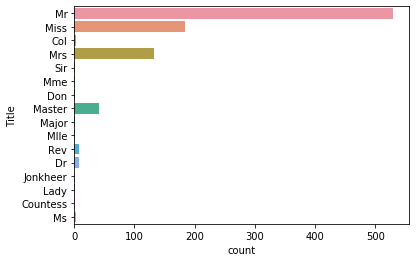

In [31]:
#extracting the various title in Names column
for dataset in Combined_data:
    dataset['Title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
#Plotting the various titles extracted from the names
sns.countplot(y='Title',data=train)

There are some titles that are very rare like Capt and Lady. It would be better to group such titles under one name know as 'rare'. Some titles also seem to be incorrectly spelled. They also need to be rectified.

In [32]:
#Refining the title feature by merging some titles
for dataset in Combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')
dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
train.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
2,Mlle,1.000000
3,Mme,1.000000
5,Mrs,0.774436
1,Miss,0.630435
6,Ms,0.500000
0,Master,0.487805
7,Special,0.375000
4,Mr,0.150943


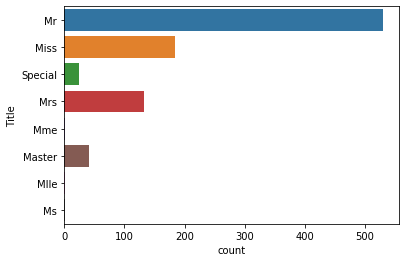

In [33]:
#Now lets see the distribution of the title feature
sns.countplot(y='Title',data=train)

In [34]:
#Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Combined_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

As we observed from our data visualization being alone on the titanic had a disadvantage when it came to survival: 
    
Next we will create a feature IsAlone which depends on the number of family members that can be calculated from the Parch and SibSp columns

In [35]:
#Creating a new feature IsAlone from the SibSp and Parch columns
for dataset in Combined_data:
    dataset["Family"] = dataset['Siblings_spouses'] + dataset['Parchil']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
train.head()

,ticket_class,name,sex,age,Siblings_spouses,Parchil,fare,embarked,MedBoat,Survived,Title,IsAlone
0,3,"Smiljanic, Mr. Mile",male,28.0,0,0,8.6625,S,NaN,0,1.0,1
1,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,7.8958,S,NaN,0,1.0,1
2,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,26.0000,S,11,1,2.0,1
3,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.5500,S,NaN,0,2.0,0
4,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,7.7750,S,NaN,0,2.0,1


Getting rid of the columns that are not required anymore:

In [36]:
#dropping the Name,Siblings_spouses and Parchil columns
for dataset in Combined_data:
    dataset.drop(['Siblings_spouses','Parchil','name'],axis=1,inplace=True)

Age had big role to play when it came to survival. Clearly younger people were more likely to survive. Hence, it should be worth considering a feature IsMinor for the passengers under the age of 15.

In [37]:
#Creating another feature if the passenger is a child
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["age"] < 15, 1, 0)

In [ ]:
Older female passengers also had a higher chance of survival. 
Let's create a feature name Old_female that would account for women older tha 50 years on board

In [38]:
train['Old_Female'] = (train['age']>50)&(train['sex']=='female')
train['Old_Female'] = train['Old_Female'].astype(int)

test['Old_Female'] = (test['age']>50)&(test['sex']=='female')
test['Old_Female'] = test['Old_Female'].astype(int)

ticket_class, sex and embarked are the categorical features in our data.
we can convert these categorucal variables into dummy variables using the get_dummies method in python

In [39]:
#Converting categorical variables into numerical ones
train2 = pd.get_dummies(train,columns=['ticket_class','sex','embarked'],drop_first=True)
test2 = pd.get_dummies(test,columns=['ticket_class','sex','embarked'],drop_first=True)
train2.head()

,age,fare,MedBoat,Survived,Title,IsAlone,IsMinor,Old_Female,ticket_class_2,ticket_class_3,sex_male,embarked_Q,embarked_S
0,28.0,8.6625,NaN,0,1.0,1,0,0,0,1,1,0,1
1,26.0,7.8958,NaN,0,1.0,1,0,0,0,1,1,0,1
2,19.0,26.0000,11,1,2.0,1,0,0,1,0,0,0,1
3,28.0,69.5500,NaN,0,2.0,0,0,0,0,1,0,0,1
4,28.0,7.7750,NaN,0,2.0,1,0,0,0,1,0,0,1


In [40]:
test2.head()

,age,fare,MedBoat,Title,IsAlone,IsMinor,Old_Female,ticket_class_2.0,ticket_class_3.0,sex_male,embarked_Q,embarked_S
0,35.0,7.1250,NaN,1,1,0,0,0,1,1,0,1
1,20.0,15.7417,C,1,0,0,0,0,1,1,0,0
2,28.0,7.8958,NaN,1,1,0,0,0,1,1,0,1
3,28.0,8.0500,NaN,1,1,0,0,0,1,1,0,1
4,28.0,7.7500,NaN,1,1,0,0,0,1,1,1,0


Age and Fare columns have continuous data and there might be fluctuations that do not reflect patterns in the data, 
which might be noise. That's why wel put people that are within a certain range of age or fare in the same bin. 
This can be achieved using qcut method in pandas

In [41]:
#creating Age bands
train2['AgeBands'] = pd.qcut(train2.age,4,labels=False)
test2['AgeBands'] = pd.qcut(test2.age,4,labels=False)

In [42]:
#Dropping the Age and Fare columns
train2.drop(['age','fare'],axis=1,inplace=True)
test2.drop(['age','fare'],axis=1,inplace=True)

In [43]:
#Dropping the MedBoat columns
train2.drop(['MedBoat'],axis=1,inplace=True)
test2.drop(['MedBoat'],axis=1,inplace=True)

Let's take a final look at our training and testing data before we proceed to build our model.

In [44]:
train2.head()

,Survived,Title,IsAlone,IsMinor,Old_Female,ticket_class_2,ticket_class_3,sex_male,embarked_Q,embarked_S,AgeBands
0,0,1.0,1,0,0,0,1,1,0,1,1
1,0,1.0,1,0,0,0,1,1,0,1,1
2,1,2.0,1,0,0,1,0,0,0,1,0
3,0,2.0,0,0,0,0,1,0,0,1,1
4,0,2.0,1,0,0,0,1,0,0,1,1


In [45]:
test2.head()

,Title,IsAlone,IsMinor,Old_Female,ticket_class_2.0,ticket_class_3.0,sex_male,embarked_Q,embarked_S,AgeBands
0,1,1,0,0,0,1,1,0,1,2
1,1,0,0,0,0,1,1,0,0,0
2,1,1,0,0,0,1,1,0,1,1
3,1,1,0,0,0,1,1,0,1,1
4,1,1,0,0,0,1,1,1,0,1


In [46]:
#Checking for missing values in the train dataset
train2.isnull().any()

Survived          False
Title             False
IsAlone           False
IsMinor           False
Old_Female        False
ticket_class_2    False
ticket_class_3    False
sex_male          False
embarked_Q        False
embarked_S        False
AgeBands          False
dtype: bool

In [47]:
#Checking for missing values in the test dataset
test2.isnull().any()

Title               False
IsAlone             False
IsMinor             False
Old_Female          False
ticket_class_2.0    False
ticket_class_3.0    False
sex_male            False
embarked_Q          False
embarked_S          False
AgeBands            False
dtype: bool

    7) Machine Learning

We will try out some different ML models to see which gives us the best result. the process will be as follows:

Importing the required machine learning libraries from scikit learn.

Splitting out training data into train and test datasets to check the performance of our model.

Try out different classifying model to see which fits the best.

In [48]:
#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [49]:
#Splitting out training data into X: features and y: target
X = train2.drop("Survived",axis=1)
y = train2["Survived"]
#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [50]:
#Gradient Boost Classifier
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}
gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)
gbk_cv.fit(X, y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 5, 'n_estimators': 11}
Best score: 81.33187772925764


Our score also depends on how we had split our training data using train_test_split. 
We should also perform k-fold cross validation to get a more accurate score. Here we will be going with 5 folds.

In [51]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_logreg

#let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,y,cv=5)
np.mean(cv_scores)*100

78.93086243763365

In [52]:
#Decision Tree Classifier
decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}
clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)
clf_cv.fit(X, y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 3}
Best score: 80.89519650655022


In [53]:
#Random Forest CLassifier
random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}
rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)
rf_cv.fit(X, y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 16}
Best score: 79.47598253275109


    7) Submission. 
Finally, we are ready to submit our solution to see where we rank. 
To do so we need to make a submission.csv file that contains only the PassengerId and our predictions for those ID's.

In [54]:
#SUBMISSION
y_final = clf_cv.predict(test2)
submission = pd.DataFrame({"traveller_ID": test_traveller["traveller_ID"],"Survived": y_final})
submission.head()
submission.to_csv('Abuja_Samuel_Mbah_Prediction.csv', index=False)